In [1]:
shape_cat=""
vol=""
z_range=""

In [1]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "all_z"


In [2]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
drop_id=clusters[('Alt','Alt1','ID_CENT')]

In [6]:
satellite=shapes.drop(drop_id)

In [7]:
NBINS=10

In [8]:
print(len(clusters))

12482


In [9]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [10]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [11]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            sats=satellite[satellite['All','MEM_MATCH_ID']==cen_mat_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(satellite)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = -sats_e1, g2   = -sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [12]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [13]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])

    i=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[(i),:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            print(e)
    return (ng_list)

In [14]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

7936it [01:27, 91.70it/s]

Catalog has no objects!


10908it [01:59, 92.20it/s]

Catalog has no objects!


10958it [02:00, 91.93it/s]

Catalog has no objects!


11049it [02:01, 91.43it/s]

Catalog has no objects!


11329it [02:04, 92.48it/s]

Catalog has no objects!


12267it [02:14, 92.97it/s]

Catalog has no objects!


12318it [02:15, 95.93it/s]

Catalog has no objects!


12429it [02:16, 93.85it/s]

Catalog has no objects!


12449it [02:16, 96.41it/s]

Catalog has no objects!
Catalog has no objects!


12482it [02:16, 91.17it/s]
7939it [01:24, 94.95it/s]

Catalog has no objects!


10904it [01:56, 95.75it/s]

Catalog has no objects!


10955it [01:57, 94.78it/s]

Catalog has no objects!


11046it [01:58, 95.77it/s]

Catalog has no objects!


11330it [02:01, 96.18it/s]

Catalog has no objects!


12263it [02:11, 95.19it/s]

Catalog has no objects!


12314it [02:11, 95.59it/s]

Catalog has no objects!


12425it [02:12, 95.58it/s]

Catalog has no objects!


12457it [02:13, 98.50it/s]

Catalog has no objects!
Catalog has no objects!


12482it [02:13, 93.61it/s]


In [15]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [16]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [17]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [18]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [19]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [20]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [21]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

# Abs Plots

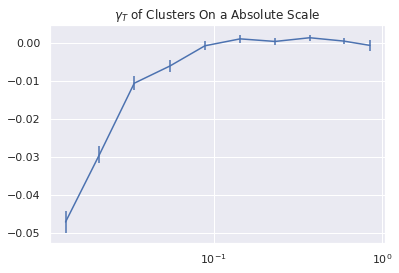

[ 74.3541  96.568   54.9511  51.8296   9.5902 -26.6949 -16.2183 -64.852
 -25.2328   6.5631]
------------------------------------------------------------------------------
[ -6828.7228 -12722.1448 -17673.627  -25008.7117 -34585.9635 -44846.2807
 -49931.2637 -44189.503  -23020.9087  -1947.8307]
------------------------------------------------------------------------------
[ 1579.  3295.  5219.  8621. 14284. 23116. 34131. 44674. 43621. 11642.]
------------------------------------------------------------------------------
[ 0.0471  0.0293  0.0105  0.006   0.0007 -0.0012 -0.0005 -0.0015 -0.0006
  0.0006]
------------------------------------------------------------------------------
[-4.3247 -3.861  -3.3864 -2.9009 -2.4213 -1.9401 -1.4629 -0.9892 -0.5277
 -0.1673]
------------------------------------------------------------------------------


In [22]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_T$ of Clusters On a Absolute Scale ")
for data  in sum_abs:
    print(data)
    print(sep)
for data in mean_abs:
    print(data)
    print(sep)

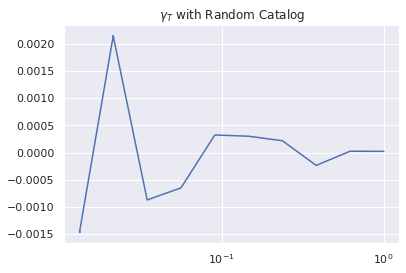

[-1.4637e-03  2.1491e-03 -8.7399e-04 -6.5203e-04  3.2370e-04  3.0057e-04
  2.1715e-04 -2.3727e-04  2.4217e-05  2.1984e-05]
[ 1.3101e-05 -1.9236e-05  7.8229e-06  5.8361e-06 -2.8973e-06 -2.6904e-06
 -1.9436e-06  2.1237e-06 -2.1676e-07 -1.9678e-07]


In [23]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_T$ with Random Catalog")
print(-r_xi)
print(r_sigma)

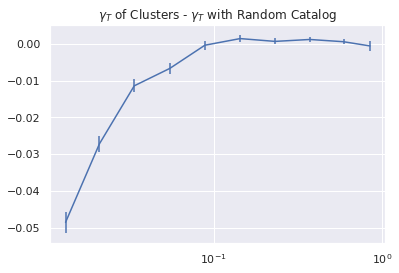

In [24]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_T$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

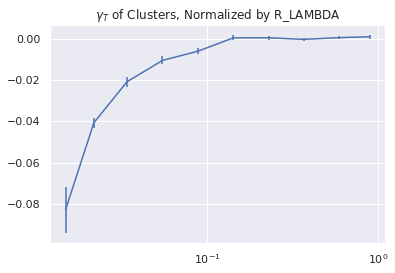

[ 72.5602  98.8338  87.284   70.3517  66.655   -7.2543 -12.6691  13.049
 -24.0953 -30.5798]
------------------------------------------------------------------------------
[ -3683.7732  -9280.4294 -14142.5969 -19405.6229 -26680.63   -35365.9988
 -41474.4222 -40049.9839 -25344.599   -3553.924 ]
------------------------------------------------------------------------------
[  876.0972  2426.7471  4185.7973  6687.5944 10999.7975 18141.4734
 28111.9078 39917.9197 47475.7547 31776.6933]
------------------------------------------------------------------------------
[ 0.0828  0.0407  0.0209  0.0105  0.0061 -0.0004 -0.0005  0.0003 -0.0005
 -0.001 ]
------------------------------------------------------------------------------
[-4.2048 -3.8242 -3.3787 -2.9017 -2.4256 -1.9495 -1.4753 -1.0033 -0.5338
 -0.1118]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [25]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA")
for data  in sum_rel:
    print(data)
    print(sep)
for data in mean_rel:
    print(data)
    print(sep)